In [14]:
import pandas as pd

us_df = pd.read_csv("./OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[['CountryName', 'RegionName', 'RegionCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
us_df = us_df.dropna()
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%Y%m%d')
us_df["RegionCode"] = us_df['RegionCode'].str[3:]


chosen_date = pd.to_datetime("2021-01-01", format='%Y-%m-%d')
us_df = us_df[us_df["Date"] == chosen_date]
us_df_plot = us_df[["RegionCode", "ConfirmedCases"]]
us_df_plot

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3351131780.py:3: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("./OxCGRT_fullwithnotes_USA_v1.csv")


,RegionCode,ConfirmedCases
1462,AK,47019
2558,AL,365747
3654,AR,229442
4750,AZ,530267
5846,CA,2434974
6942,CO,362438
8038,CT,185708
9134,DC,29252
10230,DE,58064
11326,FL,1323315


In [ ]:
# plot overall view, normalize against pop size
# plot regional view, normalize against size of region

In [17]:
import pandas as pd

us_df = pd.read_csv("./OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[['CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
us_df = us_df.dropna()
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%Y%m%d')
us_df = us_df.groupby('Date')[['ConfirmedCases', 'ConfirmedDeaths']].sum().reset_index()

us_population = 331_000_000
us_df['ConfirmedCasesPer100K'] = us_df['ConfirmedCases'] / us_population * 100_000
us_df['ConfirmedDeathsPer100K'] = us_df['ConfirmedDeaths'] / us_population * 100_000
us_df

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/330495450.py:3: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("./OxCGRT_fullwithnotes_USA_v1.csv")


,Date,ConfirmedCases,ConfirmedDeaths,ConfirmedCasesPer100K,ConfirmedDeathsPer100K
0,2020-01-01,0,0,0.000000,0.000000
1,2020-01-02,0,0,0.000000,0.000000
2,2020-01-03,0,0,0.000000,0.000000
3,2020-01-04,0,0,0.000000,0.000000
4,2020-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...
1091,2022-12-27,199853064,2175091,60378.569184,657.127190
1092,2022-12-28,200078888,2177061,60446.793958,657.722356
1093,2022-12-29,200285566,2178898,60509.234441,658.277341
1094,2022-12-30,200356424,2179325,60530.641692,658.406344


In [21]:
# Load and prepare U.S. data
us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[['CountryName', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
us_df = us_df.dropna()
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%Y%m%d')
us_df_grouped = us_df.groupby('Date')[['ConfirmedCases', 'ConfirmedDeaths']].sum().reset_index()
us_population = 331_000_000  # U.S. population
us_df_grouped['CasesPerCapita'] = us_df_grouped['ConfirmedCases'] / us_population * 100_000
us_df_grouped['DeathsPerCapita'] = us_df_grouped['ConfirmedDeaths'] / us_population * 100_000
us_df_grouped['Country'] = 'US'

# Calculate daily case and death rates for U.S.
us_df_grouped['DailyCaseRate'] = us_df_grouped['ConfirmedCases'] - us_df_grouped['ConfirmedCases'].shift(1)
us_df_grouped['DailyDeathRate'] = us_df_grouped['ConfirmedDeaths'] - us_df_grouped['ConfirmedDeaths'].shift(1)
us_df_grouped['DailyCaseRate'] = us_df_grouped['DailyCaseRate'].apply(lambda x: max(0, x))
us_df_grouped['DailyDeathRate'] = us_df_grouped['DailyDeathRate'].apply(lambda x: max(0, x))
us_df_grouped[us_df_grouped["Date"] >= "2022-01-08"]

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3287585865.py:2: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")


,Date,ConfirmedCases,ConfirmedDeaths,CasesPerCapita,DeathsPerCapita,Country,DailyCaseRate,DailyDeathRate
738,2022-01-08,119767560,1672638,36183.552870,505.328701,US,810200.0,1742.0
739,2022-01-09,120745726,1673868,36479.071299,505.700302,US,978166.0,1230.0
740,2022-01-10,123447419,1677963,37295.292749,506.937462,US,2701693.0,4095.0
741,2022-01-11,125017106,1682980,37769.518429,508.453172,US,1569687.0,5017.0
742,2022-01-12,126714533,1688654,38282.336254,510.167372,US,1697427.0,5674.0
...,...,...,...,...,...,...,...,...
1091,2022-12-27,199853064,2175091,60378.569184,657.127190,US,219662.0,709.0
1092,2022-12-28,200078888,2177061,60446.793958,657.722356,US,225824.0,1970.0
1093,2022-12-29,200285566,2178898,60509.234441,658.277341,US,206678.0,1837.0
1094,2022-12-30,200356424,2179325,60530.641692,658.406344,US,70858.0,427.0


In [ ]:
us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[['RegionCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
us_df = us_df.dropna()
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%Y%m%d')
us_df

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3981248676.py:1: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")


,RegionCode,Date,ConfirmedCases,ConfirmedDeaths
1096,US_AK,2020-01-01,0,0
1097,US_AK,2020-01-02,0,0
1098,US_AK,2020-01-03,0,0
1099,US_AK,2020-01-04,0,0
1100,US_AK,2020-01-05,0,0
...,...,...,...,...
56987,US_WY,2022-12-27,182847,1958
56988,US_WY,2022-12-28,182847,1958
56989,US_WY,2022-12-29,182847,1958
56990,US_WY,2022-12-30,182847,1958


In [25]:
can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")
can_df = can_df[['RegionCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
can_df = can_df.dropna()
can_df['Date'] = pd.to_datetime(can_df['Date'], format='%Y%m%d')
can_df["RegionCode"] = can_df['RegionCode'].str[4:]

# Population data for each Canadian province (estimates)
province_population = {
    'AB': 4413146, 'BC': 5110917, 'MB': 1377517, 'NB': 789225, 'NL': 521365,
    'NS': 979351, 'NT': 45161, 'NU': 39097, 'ON': 14734014, 'PE': 164318,
    'QC': 8537674, 'SK': 1177884, 'YT': 42176
}

# Normalize Canada data
can_df['CasesPer100K'] = can_df.apply(
    lambda row: (row['ConfirmedCases'] / province_population.get(row['RegionCode'], 1)) * 100000, axis=1
)
can_df['DeathsPer100K'] = can_df.apply(
    lambda row: (row['ConfirmedDeaths'] / province_population.get(row['RegionCode'], 1)) * 100000, axis=1
)
can_df

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3959828829.py:1: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")


,RegionCode,Date,ConfirmedCases,ConfirmedDeaths,CasesPer100K,DeathsPer100K
0,AB,2020-01-01,0,0,0.000000,0.000000
1,AB,2020-01-02,0,0,0.000000,0.000000
2,AB,2020-01-03,0,0,0.000000,0.000000
3,AB,2020-01-04,0,0,0.000000,0.000000
4,AB,2020-01-05,0,0,0.000000,0.000000
...,...,...,...,...,...,...
14243,YT,2022-12-27,4989,32,11829.002276,75.872534
14244,YT,2022-12-28,4989,32,11829.002276,75.872534
14245,YT,2022-12-29,4989,32,11829.002276,75.872534
14246,YT,2022-12-30,4989,32,11829.002276,75.872534


In [35]:
import pandas as pd
import plotly.express as px
import requests

# Sample data
data = {
    'RegionCode': ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT'],
    'case counts': [100, 150, 80, 50, 60, 70, 20, 10, 200, 30, 180, 90, 15]
}

df = pd.DataFrame(data)

# Mapping province codes to province names
province_codes = {
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'MB': 'Manitoba',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'NS': 'Nova Scotia',
    'NT': 'Northwest Territories',
    'NU': 'Nunavut',
    'ON': 'Ontario',
    'PE': 'Prince Edward Island',
    'QC': 'Quebec',
    'SK': 'Saskatchewan',
    'YT': 'Yukon'
}

df['ProvinceName'] = df['RegionCode'].map(province_codes)

# Load GeoJSON file for Canadian provinces
geojson_url = 'https://gist.githubusercontent.com/M1r1k/d5731bf39e1dfda5b53b4e4c560d968d/raw/c774258085ddc11776591ce95f2240d0fd0657a2/canada_provinces.geo.json'
response = requests.get(geojson_url)
canada_geojson = response.json()

# Create the choropleth map
fig = px.choropleth_mapbox(
    df,
    geojson=canada_geojson,
    locations='ProvinceName',
    featureidkey='properties.name',
    color='case counts',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=1,
    center={"lat": 40.4540, "lon": -110.7970},
    opacity=0.5,
    labels={'case counts': 'Case Counts'}
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


In [32]:
import pandas as pd
import plotly.express as px
import requests

# Sample data including both US states and Canadian provinces
data = {
    'RegionCode': ['AB', 'BC', 'CA', 'NY', 'ON', 'QC', 'TX', 'WA'],
    'case counts': [100, 150, 200, 250, 200, 180, 300, 220]
}

df = pd.DataFrame(data)

# Mapping region codes to full names
region_codes = {
    # Canadian provinces
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'ON': 'Ontario',
    'QC': 'Quebec',
    # US states
    'CA': 'California',
    'NY': 'New York',
    'TX': 'Texas',
    'WA': 'Washington'
}

df['RegionName'] = df['RegionCode'].map(region_codes)

# Load GeoJSON files for Canadian provinces and US states
# Canadian provinces GeoJSON
canada_geojson_url = 'https://gist.githubusercontent.com/M1r1k/d5731bf39e1dfda5b53b4e4c560d968d/raw/c774258085ddc11776591ce95f2240d0fd0657a2/canada_provinces.geo.json'
canada_geojson = requests.get(canada_geojson_url).json()

# US states GeoJSON
us_geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_geojson = requests.get(us_geojson_url).json()

# Combine the GeoJSON data
combined_geojson = {
    "type": "FeatureCollection",
    "features": canada_geojson['features'] + us_geojson['features']
}

# Create the choropleth map
fig = px.choropleth_mapbox(
    df,
    geojson=combined_geojson,
    locations='RegionName',
    featureidkey='properties.name',
    color='case counts',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=2,
    center={"lat": 50, "lon": -95},
    opacity=0.6,
    labels={'case counts': 'Case Counts'}
)

fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0})
fig.show()


In [37]:
import pandas as pd
import plotly.express as px
import requests

# Load U.S. data
us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[['RegionCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
us_df = us_df.dropna()
us_df['Date'] = pd.to_datetime(us_df['Date'], format='%Y%m%d')
us_df["RegionCode"] = us_df['RegionCode'].str[3:]

# Population data for each U.S. state
state_population = {
    'AL': 5024279, 'AK': 733391, 'AZ': 7151502, 'AR': 3011524, 'CA': 39538223,
    'CO': 5773714, 'CT': 3605944, 'DE': 989948, 'FL': 21538187, 'GA': 10711908,
    'HI': 1455271, 'ID': 1839106, 'IL': 12812508, 'IN': 6785528, 'IA': 3190369,
    'KS': 2937880, 'KY': 4505836, 'LA': 4657757, 'ME': 1362359, 'MD': 6177224,
    'MA': 7029917, 'MI': 10077331, 'MN': 5706494, 'MS': 2961279, 'MO': 6154913,
    'MT': 1084225, 'NE': 1961504, 'NV': 3104614, 'NH': 1377529, 'NJ': 9288994,
    'NM': 2117522, 'NY': 20201249, 'NC': 10439388, 'ND': 779094, 'OH': 11799448,
    'OK': 3959353, 'OR': 4237256, 'PA': 13002700, 'RI': 1097379, 'SC': 5118425,
    'SD': 886667, 'TN': 6910840, 'TX': 29145505, 'UT': 3271616, 'VT': 643077,
    'VA': 8631393, 'WA': 7693612, 'WV': 1793716, 'WI': 5893718, 'WY': 576851
}

# Normalize U.S. data
us_df['CasesPer100K'] = us_df.apply(
    lambda row: (row['ConfirmedCases'] / state_population.get(row['RegionCode'], 1)) * 100000, axis=1
)
us_df['DeathsPer100K'] = us_df.apply(
    lambda row: (row['ConfirmedDeaths'] / state_population.get(row['RegionCode'], 1)) * 100000, axis=1
)

# Canada data
can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")
can_df = can_df[['RegionCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths']]
can_df = can_df.dropna()
can_df['Date'] = pd.to_datetime(can_df['Date'], format='%Y%m%d')
can_df["RegionCode"] = can_df['RegionCode'].str[4:]

# Population data for each Canadian province (estimates)
province_population = {
    'AB': 4413146, 'BC': 5110917, 'MB': 1377517, 'NB': 789225, 'NL': 521365,
    'NS': 979351, 'NT': 45161, 'NU': 39097, 'ON': 14734014, 'PE': 164318,
    'QC': 8537674, 'SK': 1177884, 'YT': 42176
}

# Normalize Canada data
can_df['CasesPer100K'] = can_df.apply(
    lambda row: (row['ConfirmedCases'] / province_population.get(row['RegionCode'], 1)) * 100000, axis=1
)
can_df['DeathsPer100K'] = can_df.apply(
    lambda row: (row['ConfirmedDeaths'] / province_population.get(row['RegionCode'], 1)) * 100000, axis=1
)

# Mapping province and state codes to names
province_codes = {
    'AB': 'Alberta',
    'BC': 'British Columbia',
    'MB': 'Manitoba',
    'NB': 'New Brunswick',
    'NL': 'Newfoundland and Labrador',
    'NS': 'Nova Scotia',
    'NT': 'Northwest Territories',
    'NU': 'Nunavut',
    'ON': 'Ontario',
    'PE': 'Prince Edward Island',
    'QC': 'Quebec',
    'SK': 'Saskatchewan',
    'YT': 'Yukon'
}
can_df['RegionName'] = can_df['RegionCode'].map(province_codes)

state_codes = {code: code for code in state_population.keys()}
us_df['RegionName'] = us_df['RegionCode'].map(state_codes)

# Load GeoJSON files
# GeoJSON for Canadian provinces
canada_geojson_url = 'https://raw.githubusercontent.com/codeforgermany/click_that_hood/master/public/data/canada.geojson'
canada_geojson = requests.get(canada_geojson_url).json()

# GeoJSON for U.S. states
us_geojson_url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json'
us_geojson = requests.get(us_geojson_url).json()

# Choose a specific date for the maps
chosen_date = pd.to_datetime("2021-01-01", format='%Y-%m-%d')
us_df = us_df[us_df["Date"] == chosen_date]
can_df = can_df[can_df["Date"] == chosen_date]

# Plotly Choropleth Map for U.S. Cases Per 100K
fig_us_case = px.choropleth_mapbox(
    us_df,
    geojson=us_geojson,
    locations='RegionName',
    featureidkey='properties.name',
    color='CasesPer100K',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.0902, "lon": -95.7129},
    opacity=0.5,
    labels={'CasesPer100K': 'Cases Per 100K'},
    range_color=(0, 15000),
)
fig_us_case.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

# Plotly Choropleth Map for U.S. Deaths Per 100K
fig_us_death = px.choropleth_mapbox(
    us_df,
    geojson=us_geojson,
    locations='RegionName',
    featureidkey='properties.name',
    color='DeathsPer100K',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 37.0902, "lon": -95.7129},
    opacity=0.5,
    labels={'DeathsPer100K': 'Deaths Per 100K'},
    range_color=(0, 250),
)
fig_us_death.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

# Plotly Choropleth Map for Canada Cases Per 100K
fig_can_case = px.choropleth_mapbox(
    can_df,
    geojson=canada_geojson,
    locations='RegionName',
    featureidkey='properties.name',
    color='CasesPer100K',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 60, "lon": -95},
    opacity=0.5,
    labels={'CasesPer100K': 'Cases Per 100K'},
    range_color=(0, 15000),
)
fig_can_case.update_layout(margin={"r":0, "t":0, "l":0, "b":0})

# Plotly Choropleth Map for Canada Deaths Per 100K
fig_can_death = px.choropleth_mapbox(
    can_df,
    geojson=canada_geojson,
    locations='RegionName',
    featureidkey='properties.name',
    color='DeathsPer100K',
    color_continuous_scale="Viridis",
    mapbox_style="carto-positron",
    zoom=3,
    center={"lat": 60, "lon": -95},
    opacity=0.5,
    labels={'DeathsPer100K': 'Deaths Per 100K'},
    range_color=(0, 250),
)
fig_can_death.update_layout(margin={"r":0, "t":0, "l":0, "b":0})


/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3307668569.py:6: DtypeWarning:

Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/3307668569.py:35: DtypeWarning:

Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.



In [42]:
can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")
print(can_df["RegionName"].unique())
print(can_df["RegionCode"].unique())

['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Northwest Territories'
 'Nunavut' 'Ontario' 'Prince Edward Island' 'Quebec' 'Saskatchewan'
 'Yukon' nan]
['CAN_AB' 'CAN_BC' 'CAN_MB' 'CAN_NB' 'CAN_NL' 'CAN_NS' 'CAN_NT' 'CAN_NU'
 'CAN_ON' 'CAN_PE' 'CAN_QC' 'CAN_SK' 'CAN_YT' nan]


/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_49507/1621097750.py:1: DtypeWarning:

Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.



In [43]:
can_df

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex
0,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,20200101,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
1,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,20200102,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
2,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,20200103,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
3,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,20200104,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
4,Canada,CAN,Alberta,CAN_AB,STATE_TOTAL,20200105,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15339,Canada,CAN,NaN,NaN,NAT_TOTAL,20221227,0.0,NaN,NaN,NaN,...,5.56,22.14,20.05,21.09,20.42,25.3,22.92,24.11,23.34,0.0
15340,Canada,CAN,NaN,NaN,NAT_TOTAL,20221228,0.0,NaN,NaN,NaN,...,5.56,22.14,20.05,21.09,20.42,25.3,22.92,24.11,23.34,0.0
15341,Canada,CAN,NaN,NaN,NAT_TOTAL,20221229,0.0,NaN,NaN,NaN,...,5.56,22.14,20.05,21.09,20.42,25.3,22.92,24.11,23.34,0.0
15342,Canada,CAN,NaN,NaN,NAT_TOTAL,20221230,0.0,NaN,NaN,NaN,...,5.56,22.14,20.05,21.09,20.42,25.3,22.92,24.11,23.34,0.0


In [22]:
can_population = 38_000_000 
can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")
can_nat_df = can_df[can_df["Jurisdiction"] == "NAT_TOTAL"][["Date", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "ConfirmedCases", "ConfirmedDeaths"]]
can_nat_df["Date"] = pd.to_datetime(can_nat_df['Date'], format='%Y%m%d')
can_nat_df["ConfirmedCases"] = can_nat_df["ConfirmedCases"] / can_population * 100000
can_nat_df["ConfirmedDeaths"] = can_nat_df["ConfirmedDeaths"] / can_population * 100000
can_nat_df["DailyCaseRate"] = can_nat_df["ConfirmedCases"].diff().fillna(0)
can_nat_df["DailyDeathRate"] = can_nat_df["ConfirmedDeaths"].diff().fillna(0)
can_nat_df = can_nat_df[["Date", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "DailyCaseRate", "DailyDeathRate"]]
can_nat_df

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_4947/2190634917.py:2: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")


,Date,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,StringencyIndex_WeightedAverage,DailyCaseRate,DailyDeathRate
14248,2020-01-01,3.57,0.0,0.00,0.000000,0.000000
14249,2020-01-02,3.57,0.0,0.00,0.000000,0.000000
14250,2020-01-03,3.57,0.0,0.00,0.000000,0.000000
14251,2020-01-04,3.57,0.0,0.00,0.000000,0.000000
14252,2020-01-05,3.57,0.0,0.00,0.000000,0.000000
...,...,...,...,...,...,...
15339,2022-12-27,23.34,0.0,5.56,2.021053,0.005263
15340,2022-12-28,23.34,0.0,5.56,2.505263,0.042105
15341,2022-12-29,23.34,0.0,5.56,2.915789,0.131579
15342,2022-12-30,23.34,0.0,5.56,5.213158,0.028947


In [69]:
can_nat_df.iloc[150]

Date                                       2020-05-30 00:00:00
GovernmentResponseIndex_WeightedAverage                  61.72
ContainmentHealthIndex_WeightedAverage                   61.61
EconomicSupportIndex                                      62.5
StringencyIndex_WeightedAverage                          70.83
DailyCaseRate                                         2.005263
DailyDeathRate                                        0.152632
Name: 14398, dtype: object

/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/albertarielwidiaatmaja/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


<Axes: >

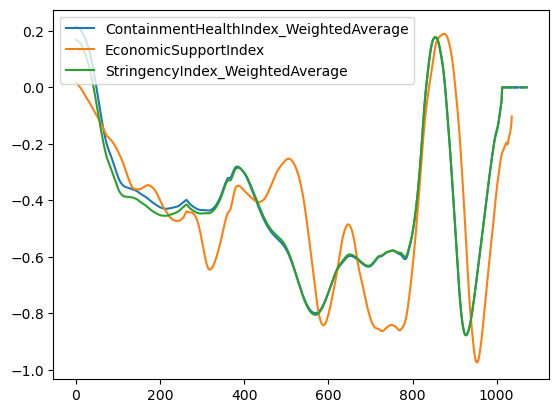

In [61]:
import pandas as pd


# Load your data
data = can_nat_df.set_index("Date")[
    ['ContainmentHealthIndex_WeightedAverage', 'EconomicSupportIndex', 'StringencyIndex_WeightedAverage', 'DailyCaseRate', 'DailyDeathRate']
    ].rolling(7).mean().dropna()

# Define the columns of interest
indices = ['ContainmentHealthIndex_WeightedAverage', 'EconomicSupportIndex', 'StringencyIndex_WeightedAverage']
rates = ['DailyCaseRate', 'DailyDeathRate']

# Define the range of lags
max_lag = 1096  # Example: Analyze lags from 1 to 7 days
lagged_correlations_cases = {}
lagged_correlations_deaths = {}

# Compute correlations for each lag
for lag in range(max_lag + 1):
    lagged_data = data.copy()
    for rate in rates:
        lagged_data[f'{rate}_lag{lag}'] = lagged_data[rate].shift(lag)
    
    # Drop rows with NaN values introduced by lagging
    lagged_data = lagged_data.dropna()
    
    # Calculate correlations
    for index in indices:
        for rate in rates:
            lagged_corr = lagged_data[index].corr(lagged_data[f'{rate}_lag{lag}'])
            if rate == 'DailyCaseRate':
                lagged_correlations_cases.setdefault(index, []).append(lagged_corr)
            else:
                lagged_correlations_deaths.setdefault(index, []).append(lagged_corr)
case_df = pd.DataFrame(lagged_correlations_cases)
death_df = pd.DataFrame(lagged_correlations_cases)
case_df.plot()


In [68]:
data.iloc[150]

ContainmentHealthIndex_WeightedAverage    61.610000
EconomicSupportIndex                      62.500000
StringencyIndex_WeightedAverage           70.830000
DailyCaseRate                              1.769173
DailyDeathRate                             0.142105
Name: 2020-06-05 00:00:00, dtype: float64

In [57]:
data

,Date,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,StringencyIndex_WeightedAverage,DailyCaseRate,DailyDeathRate
14248,2020-01-01,3.12,3.57,0.0,0.00,0.000000,0.000000
14249,2020-01-02,3.12,3.57,0.0,0.00,0.000000,0.000000
14250,2020-01-03,3.12,3.57,0.0,0.00,0.000000,0.000000
14251,2020-01-04,3.12,3.57,0.0,0.00,0.000000,0.000000
14252,2020-01-05,3.12,3.57,0.0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...
15339,2022-12-27,20.42,23.34,0.0,5.56,2.021053,0.005263
15340,2022-12-28,20.42,23.34,0.0,5.56,2.505263,0.042105
15341,2022-12-29,20.42,23.34,0.0,5.56,2.915789,0.131579
15342,2022-12-30,20.42,23.34,0.0,5.56,5.213158,0.028947


/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_4947/2558966694.py:4: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")


<Axes: >

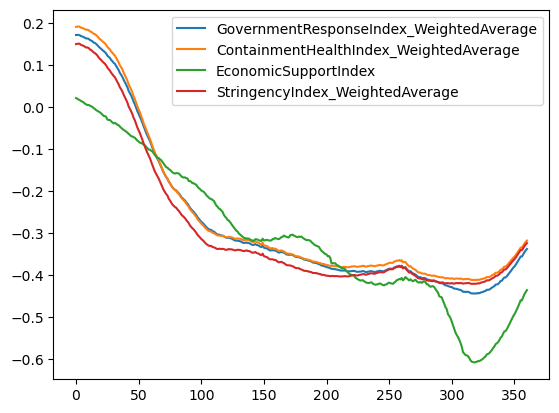

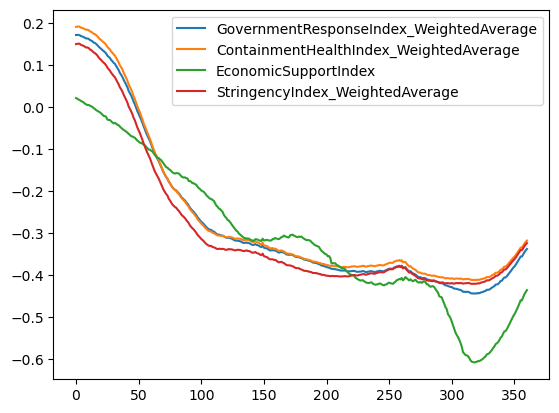

In [55]:
import pandas as pd

can_population = 38_000_000 
can_df = pd.read_csv("../data/OxCGRT_fullwithnotes_CAN_v1.csv")
can_nat_df = can_df[can_df["Jurisdiction"] == "NAT_TOTAL"][["Date", "GovernmentResponseIndex_WeightedAverage", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "ConfirmedCases", "ConfirmedDeaths"]]
can_nat_df["Date"] = pd.to_datetime(can_nat_df['Date'], format='%Y%m%d')
can_nat_df["ConfirmedCases"] = can_nat_df["ConfirmedCases"] / can_population * 100000
can_nat_df["ConfirmedDeaths"] = can_nat_df["ConfirmedDeaths"] / can_population * 100000
can_nat_df["DailyCaseRate"] = can_nat_df["ConfirmedCases"].diff().fillna(0)
can_nat_df["DailyDeathRate"] = can_nat_df["ConfirmedDeaths"].diff().fillna(0)
can_nat_df = can_nat_df[["Date", "GovernmentResponseIndex_WeightedAverage", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "DailyCaseRate", "DailyDeathRate"]]

# Load your data
data = can_nat_df

# Define the columns of interest
indices = ['GovernmentResponseIndex_WeightedAverage', 'ContainmentHealthIndex_WeightedAverage', 'EconomicSupportIndex', 'StringencyIndex_WeightedAverage']
rates = ['DailyCaseRate', 'DailyDeathRate']

# Define the range of lags
max_lag = 360  # Example: Analyze lags from 1 to 7 days
lagged_correlations_cases = {}
lagged_correlations_deaths = {}

# Compute correlations for each lag
for lag in range(max_lag + 1):
    lagged_data = data.copy()
    for rate in rates:
        lagged_data[f'{rate}_lag{lag}'] = lagged_data[rate].shift(lag)
    
    # Drop rows with NaN values introduced by lagging
    lagged_data = lagged_data.dropna()
    
    # Calculate correlations
    for index in indices:
        for rate in rates:
            lagged_corr = lagged_data[index].corr(lagged_data[f'{rate}_lag{lag}'])
            if rate == 'DailyCaseRate':
                lagged_correlations_cases.setdefault(index, []).append(lagged_corr)
            else:
                lagged_correlations_deaths.setdefault(index, []).append(lagged_corr)
case_df = pd.DataFrame(lagged_correlations_cases)
death_df = pd.DataFrame(lagged_correlations_cases)
case_df.plot()
death_df.plot()


In [56]:
can_nat_df

,Date,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,StringencyIndex_WeightedAverage,DailyCaseRate,DailyDeathRate
14248,2020-01-01,3.12,3.57,0.0,0.00,0.000000,0.000000
14249,2020-01-02,3.12,3.57,0.0,0.00,0.000000,0.000000
14250,2020-01-03,3.12,3.57,0.0,0.00,0.000000,0.000000
14251,2020-01-04,3.12,3.57,0.0,0.00,0.000000,0.000000
14252,2020-01-05,3.12,3.57,0.0,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...
15339,2022-12-27,20.42,23.34,0.0,5.56,2.021053,0.005263
15340,2022-12-28,20.42,23.34,0.0,5.56,2.505263,0.042105
15341,2022-12-29,20.42,23.34,0.0,5.56,2.915789,0.131579
15342,2022-12-30,20.42,23.34,0.0,5.56,5.213158,0.028947


/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_4947/2779641184.py:4: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")


<Axes: >

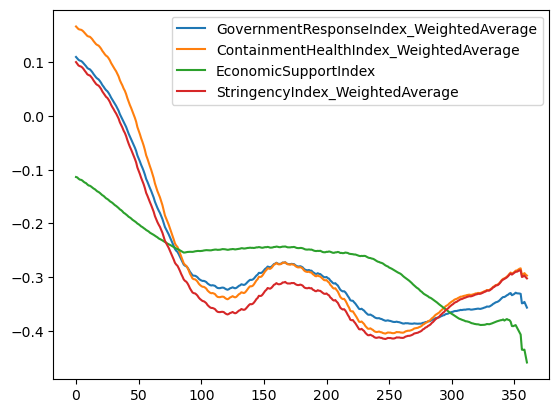

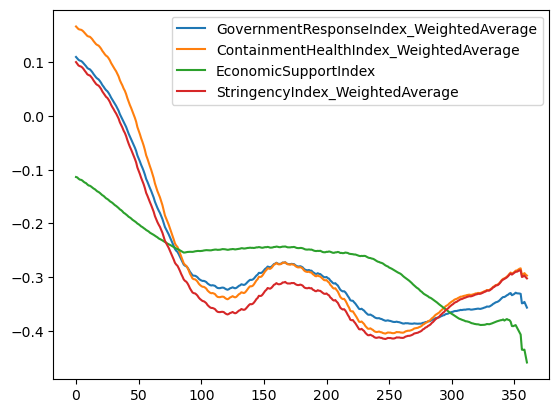

In [54]:
import pandas as pd

us_population = 331_000_000 
us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")
us_nat_df = us_df[us_df["Jurisdiction"] == "NAT_TOTAL"][["Date", "GovernmentResponseIndex_WeightedAverage", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "ConfirmedCases", "ConfirmedDeaths"]]
us_nat_df["Date"] = pd.to_datetime(us_nat_df['Date'], format='%Y%m%d')
us_nat_df["ConfirmedCases"] = us_nat_df["ConfirmedCases"] / us_population * 100000
us_nat_df["ConfirmedDeaths"] = us_nat_df["ConfirmedDeaths"] / us_population * 100000
us_nat_df["DailyCaseRate"] = us_nat_df["ConfirmedCases"].diff().fillna(0)
us_nat_df["DailyDeathRate"] = us_nat_df["ConfirmedDeaths"].diff().fillna(0)
us_nat_df = us_nat_df[["Date", "GovernmentResponseIndex_WeightedAverage", "ContainmentHealthIndex_WeightedAverage", "EconomicSupportIndex", "StringencyIndex_WeightedAverage", "DailyCaseRate", "DailyDeathRate"]]

# Load your data
data = us_nat_df

# Define the columns of interest
indices = ['GovernmentResponseIndex_WeightedAverage', 'ContainmentHealthIndex_WeightedAverage', 'EconomicSupportIndex', 'StringencyIndex_WeightedAverage']
rates = ['DailyCaseRate', 'DailyDeathRate']

# Define the range of lags
max_lag = 360  # Example: Analyze lags from 1 to 7 days
lagged_correlations_cases = {}
lagged_correlations_deaths = {}

# Compute correlations for each lag
for lag in range(max_lag + 1):
    lagged_data = data.copy()
    for rate in rates:
        lagged_data[f'{rate}_lag{lag}'] = lagged_data[rate].shift(lag)
    
    # Drop rows with NaN values introduced by lagging
    lagged_data = lagged_data.dropna()
    
    # Calculate correlations
    for index in indices:
        for rate in rates:
            lagged_corr = lagged_data[index].corr(lagged_data[f'{rate}_lag{lag}'])
            if rate == 'DailyCaseRate':
                lagged_correlations_cases.setdefault(index, []).append(lagged_corr)
            else:
                lagged_correlations_deaths.setdefault(index, []).append(lagged_corr)
case_df = pd.DataFrame(lagged_correlations_cases)
death_df = pd.DataFrame(lagged_correlations_cases)
case_df.plot()
death_df.plot()


In [76]:
us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")
us_df = us_df[us_df["Jurisdiction"] == "NAT_TOTAL"]
us_population = 331_000_000 
us_df['DailyCaseRate'] = us_df['ConfirmedCases'].diff().fillna(0)
us_df['DailyDeathRate'] = us_df['ConfirmedDeaths'].diff().fillna(0)
us_df['DailyCaseRate'] = us_df['DailyCaseRate'].apply(lambda x: max(0, x) / us_population * 100_000)
us_df['DailyDeathRate'] = us_df['DailyDeathRate'].apply(lambda x: max(0, x) / us_population * 100_000)
us_df

/var/folders/ql/hnw16fjd1bb7227zpj_cw9140000gn/T/ipykernel_4947/889892904.py:1: DtypeWarning: Columns (82,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  us_df = pd.read_csv("../data/OxCGRT_fullwithnotes_USA_v1.csv")


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex,DailyCaseRate,DailyDeathRate
0,United States,USA,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000
1,United States,USA,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000
2,United States,USA,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000
3,United States,USA,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000
4,United States,USA,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,United States,USA,NaN,NaN,NAT_TOTAL,20221227,NaN,NaN,2.0,0.0,...,35.16,38.54,37.25,47.92,40.18,44.05,42.57,0.0,33.515106,0.107553
1092,United States,USA,NaN,NaN,NAT_TOTAL,20221228,NaN,NaN,2.0,0.0,...,35.16,38.54,37.25,47.92,40.18,44.05,42.57,0.0,34.242900,0.299094
1093,United States,USA,NaN,NaN,NAT_TOTAL,20221229,NaN,NaN,2.0,0.0,...,35.16,38.54,37.25,47.92,40.18,44.05,42.57,0.0,31.451057,0.279154
1094,United States,USA,NaN,NaN,NAT_TOTAL,20221230,NaN,NaN,2.0,0.0,...,35.16,38.54,37.25,47.92,40.18,44.05,42.57,0.0,11.600302,0.065257


In [87]:
can_df["E3_Fiscal measures"].sum()

269771032892.55002

<Axes: >

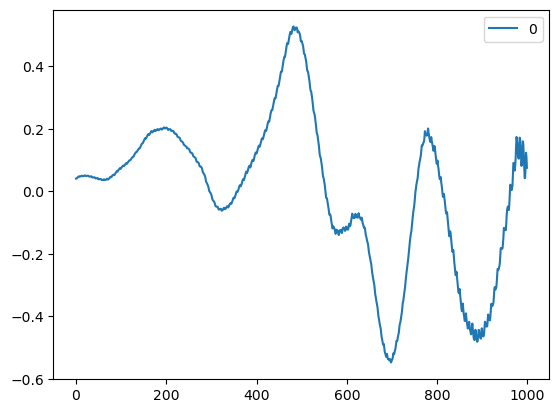

In [83]:
from scipy.stats import spearmanr

corrs = []
for i in range(1000):
    df1 = us_df["E1_Income support"]
    df2 = us_df["DailyCaseRate"].shift(-i).dropna()

    df1 = df1[:len(df2)]
    corr, _ = spearmanr(df1, df2)
    corrs.append(corr)
df = pd.DataFrame(corrs)
df.plot()

<Axes: >

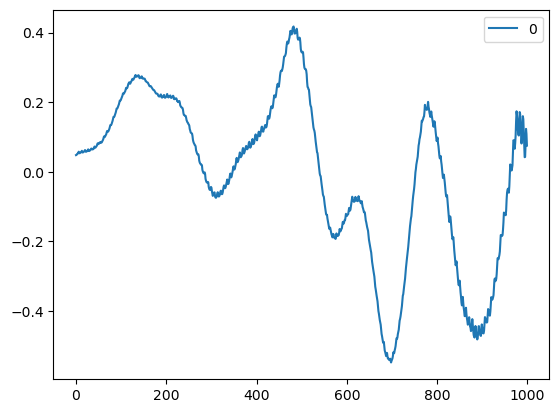

In [84]:
from scipy.stats import spearmanr

corrs = []
for i in range(1000):
    df1 = us_df["E2_Debt/contract relief"]
    df2 = us_df["DailyCaseRate"].shift(-i).dropna()

    df1 = df1[:len(df2)]
    corr, _ = spearmanr(df1, df2)
    corrs.append(corr)
df = pd.DataFrame(corrs)
df.plot()